#                                      NY Rental Properties Pricing

In [88]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

In [2]:
NYRealstate=pd.read_csv("Capstone2_NY Realstate Pricing.csv")
NYRealstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17614 entries, 0 to 17613
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   F1                     17614 non-null  int64  
 1   id                     17614 non-null  int64  
 2   neighbourhood          17614 non-null  object 
 3   latitude               17614 non-null  float64
 4   longitude              17614 non-null  float64
 5   room_type              17614 non-null  object 
 6   price                  17614 non-null  int64  
 7   days_occupied_in_2019  17614 non-null  int64  
 8   minimum_nights         17614 non-null  int64  
 9   number_of_reviews      17614 non-null  int64  
 10  reviews_per_month      17614 non-null  float64
 11  availability_2020      17614 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 1.6+ MB


Issues:
Analyze the impact of neighborhood on pricing and occupancy rates.
Determine the optimal pricing strategy for different room types.
Assess the demand and profitability of each room type.

Analyze the relationship between pricing and occupancy rates.
Determine the optimal price range for maximum occupancy and revenue.

Analyze the relationship between the number of days occupied and pricing.
Determine the ideal length of stay for optimal revenue.

Evaluate the impact of minimum nights on occupancy rates and customer satisfaction.
Determine the optimal minimum nights policy.

Assess the influence of customer reviews on pricing and occupancy rates.
Determine the correlation between positive reviews and customer satisfaction.

Insights:

In [3]:
#summary statistics:

summary_stats = NYRealstate.describe()
print(summary_stats)

                 F1            id      latitude     longitude         price  \
count  17614.000000  1.761400e+04  17614.000000  17614.000000  17614.000000   
mean   18547.564664  1.572032e+07     40.726755    -73.947732    145.455490   
std    11000.717341  9.644155e+06      0.056981      0.050213    194.990677   
min        0.000000  2.595000e+03     40.508680    -74.239860      0.000000   
25%     8192.250000  6.718288e+06     40.686042    -73.980938     70.000000   
50%    19496.500000  1.654699e+07     40.720540    -73.953050    109.000000   
75%    28686.750000  2.407707e+07     40.763127    -73.930682    170.000000   
max    35596.000000  3.056528e+07     40.908040    -73.721790   9999.000000   

       days_occupied_in_2019  minimum_nights  number_of_reviews  \
count           17614.000000    17614.000000       17614.000000   
mean              179.517656        7.392926          56.128988   
std               130.202015       19.233869          65.972370   
min                 

In [11]:
#count of unique values in categorical columns:

categorical_columns = ['neighbourhood', 'room_type']  # List of categorical column names

for col in categorical_columns:
    unique_values = NYRealstate[col].nunique()
    print(f"Number of unique values in {col}: {unique_values}")

Number of unique values in neighbourhood: 186
Number of unique values in room_type: 4


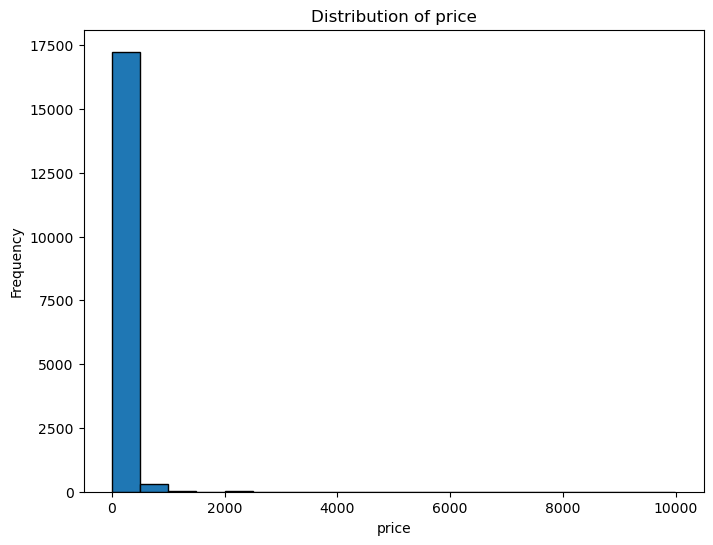

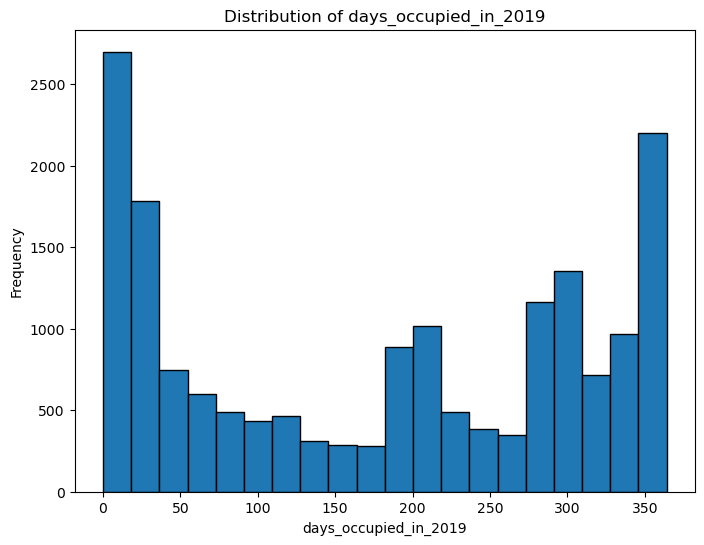

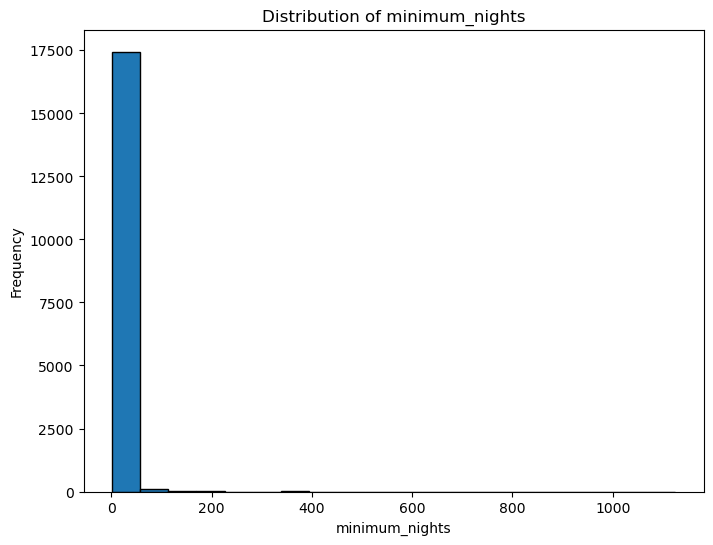

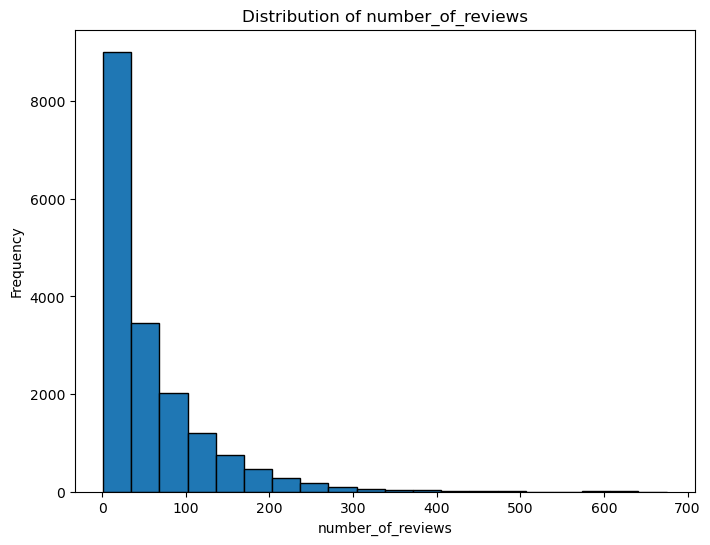

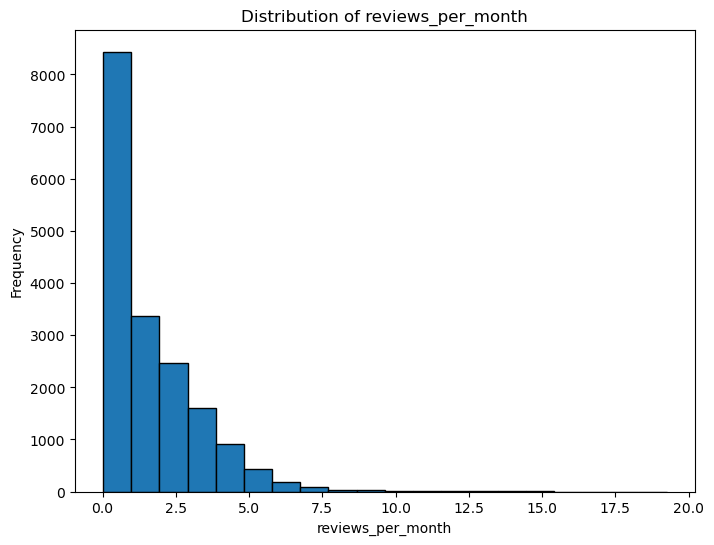

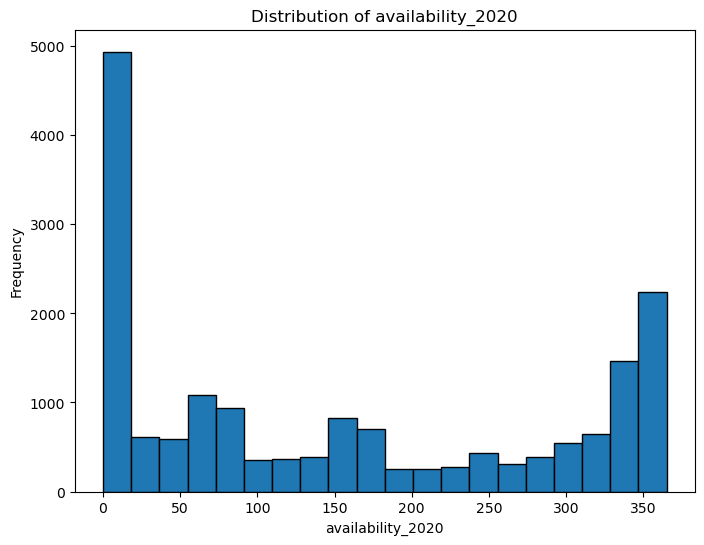

In [97]:
#Histograms of distribution of numeric columns:

numeric_columns = ['price', 'days_occupied_in_2019', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_2020']  # List of numeric column names

for col in numeric_columns:
    plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
    plt.hist(NYRealstate[col], bins=20, edgecolor='k')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.show()

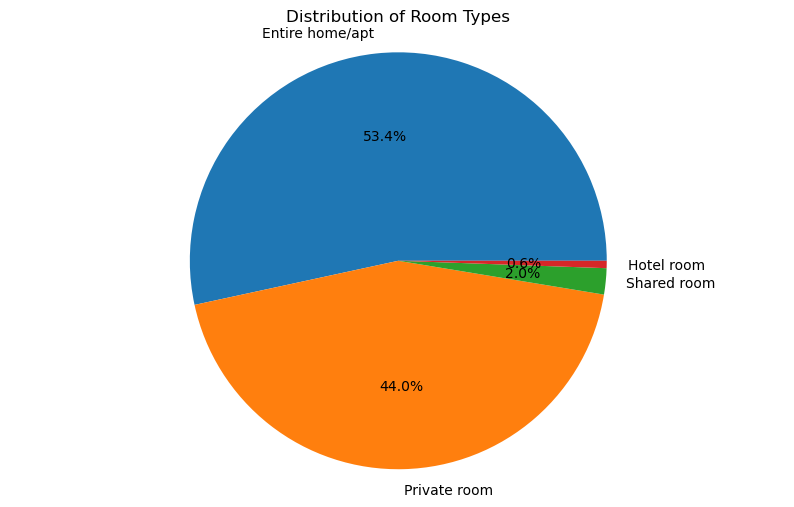

In [41]:
#Pie chart of room type distribution
roomtype_counts = NYRealstate['room_type'].value_counts()
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.pie(roomtype_counts, labels=roomtype_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Room Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

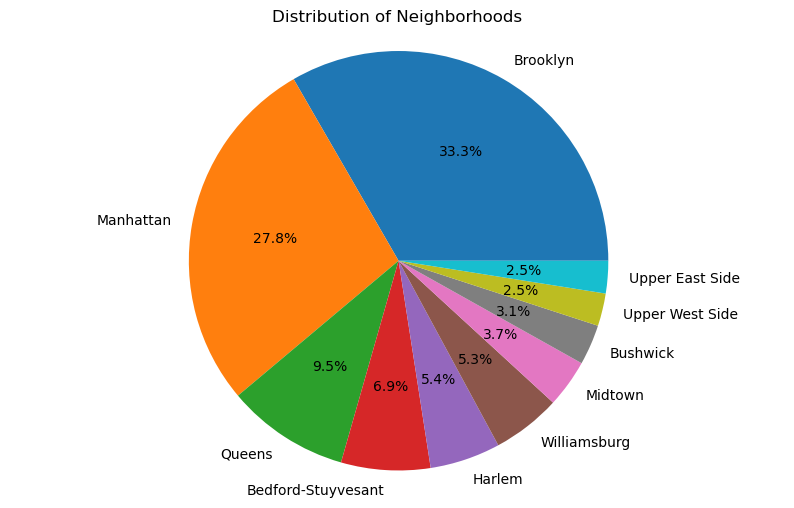

In [42]:
#Pie chart of neighborhood distribution
category_counts = NYRealstate['neighbourhood'].value_counts().sort_values(ascending=False)
top_10_neighbourhoods = category_counts.head(10)
filtered_NYRealstate = NYRealstate[NYRealstate['neighbourhood'].isin(top_10_neighbourhoods.index)]

neighborhood_counts = filtered_NYRealstate['neighbourhood'].value_counts()
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.pie(neighborhood_counts, labels=neighborhood_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Neighborhoods')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

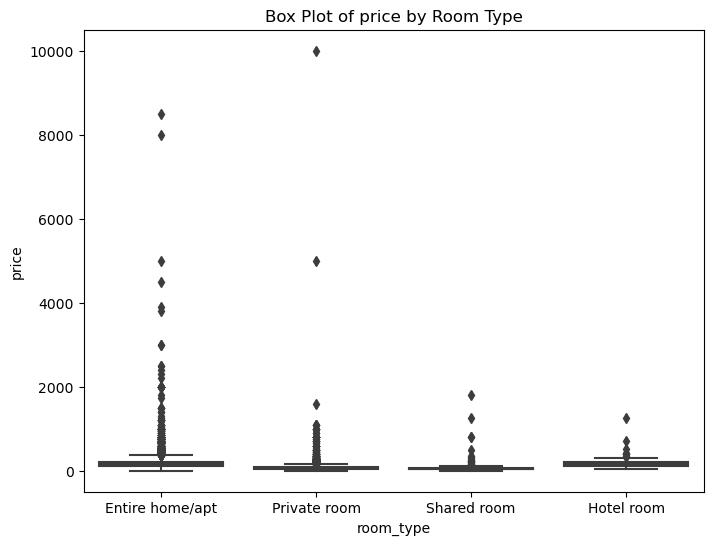

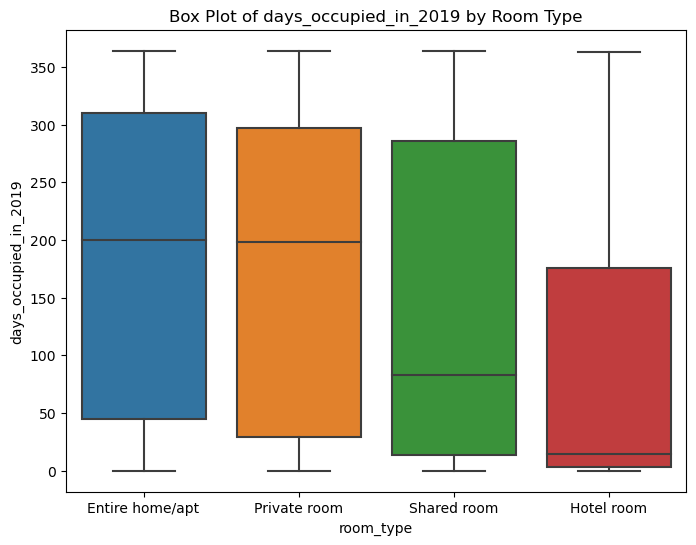

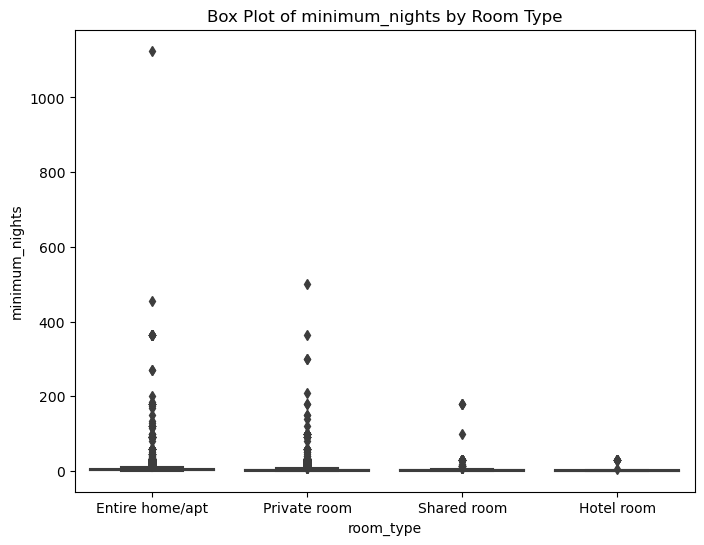

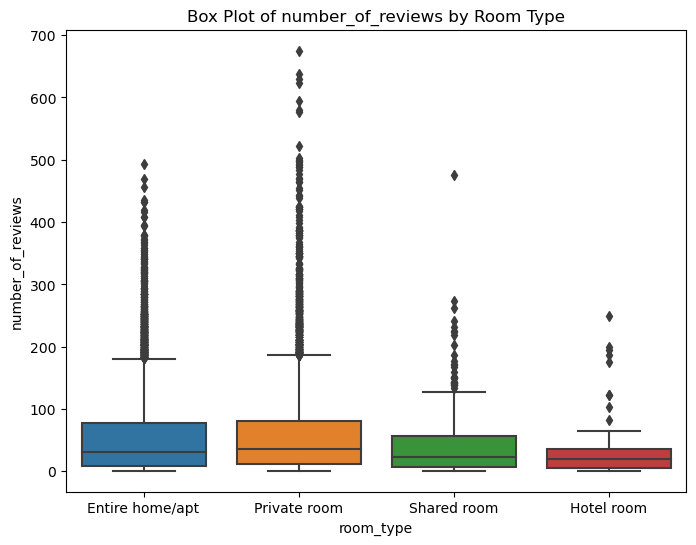

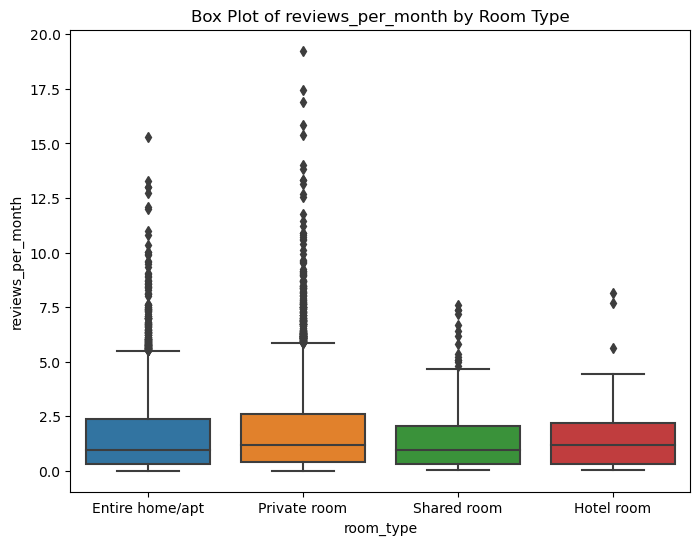

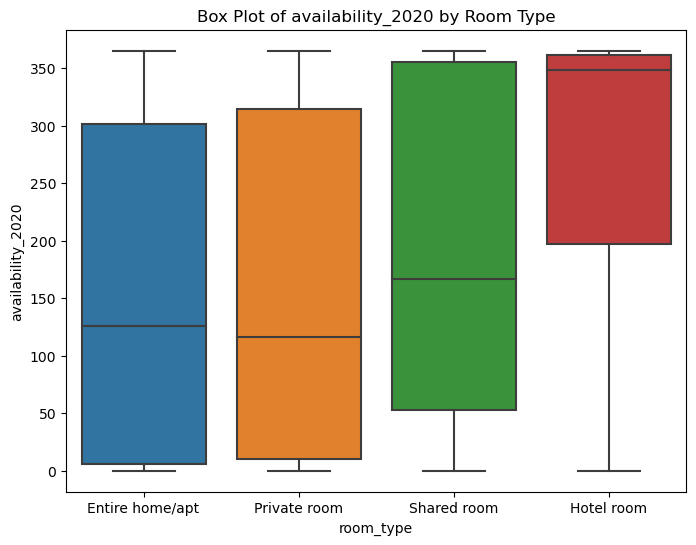

In [95]:
#Use box plots to identify outliers and compare the distribution of variables across different categories:
#variables by room type:

numeric_columns = ['price', 'days_occupied_in_2019', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_2020']  # List of numeric column namesn
for col in numeric_columns:
# 'room type' and 'neighborhood name' are categorical columns
# Box plot by room type
    plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
    sns.boxplot(x='room_type', y=col, data=NYRealstate)
    plt.xlabel('room_type')
    plt.ylabel(col)
    plt.title(f'Box Plot of {col} by Room Type')
    plt.show()

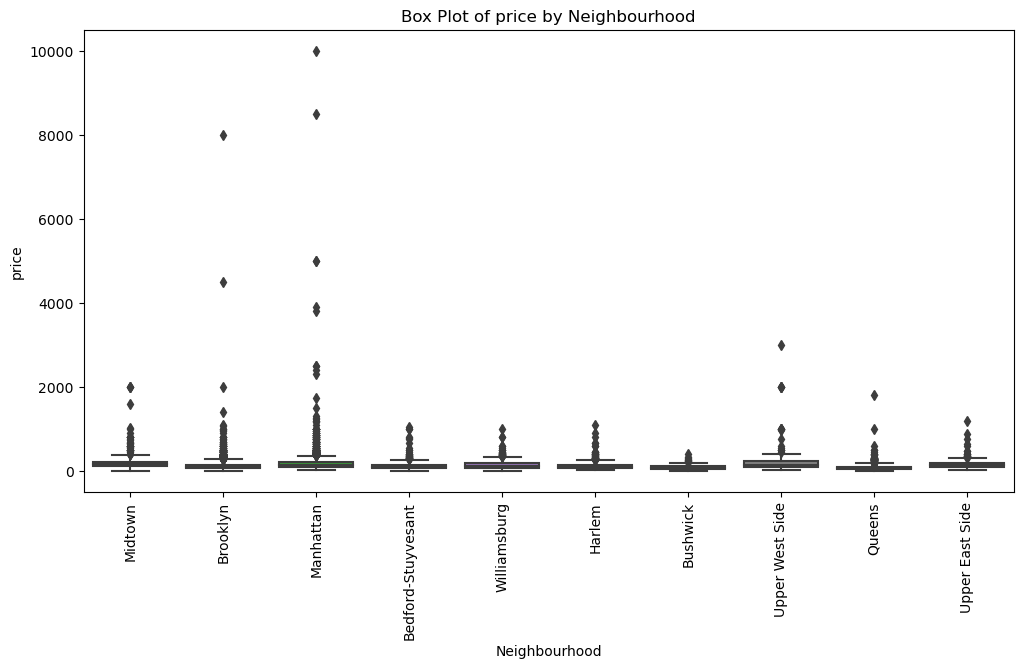

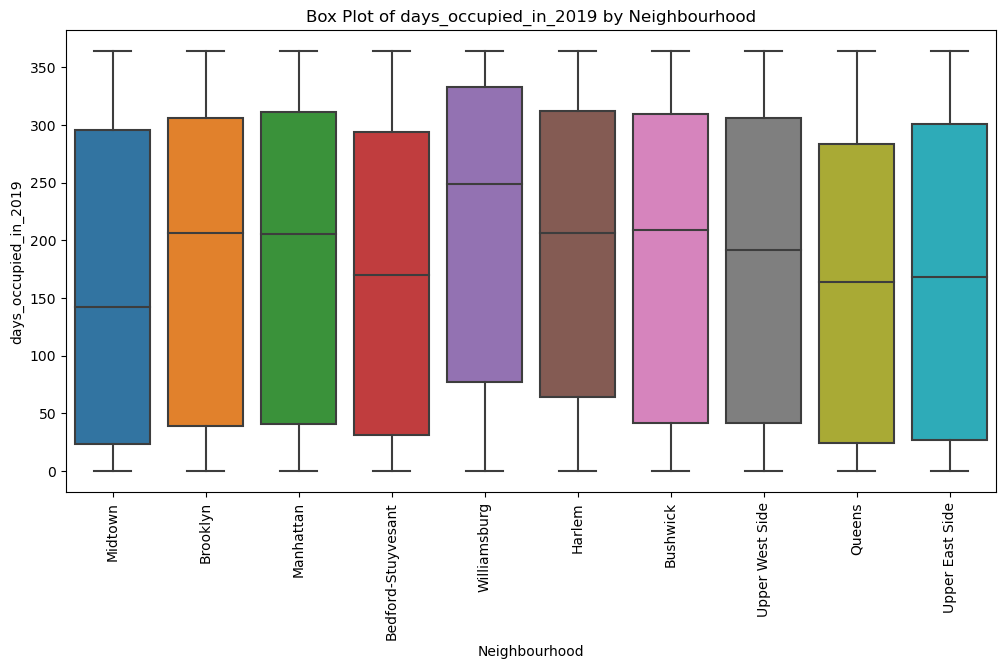

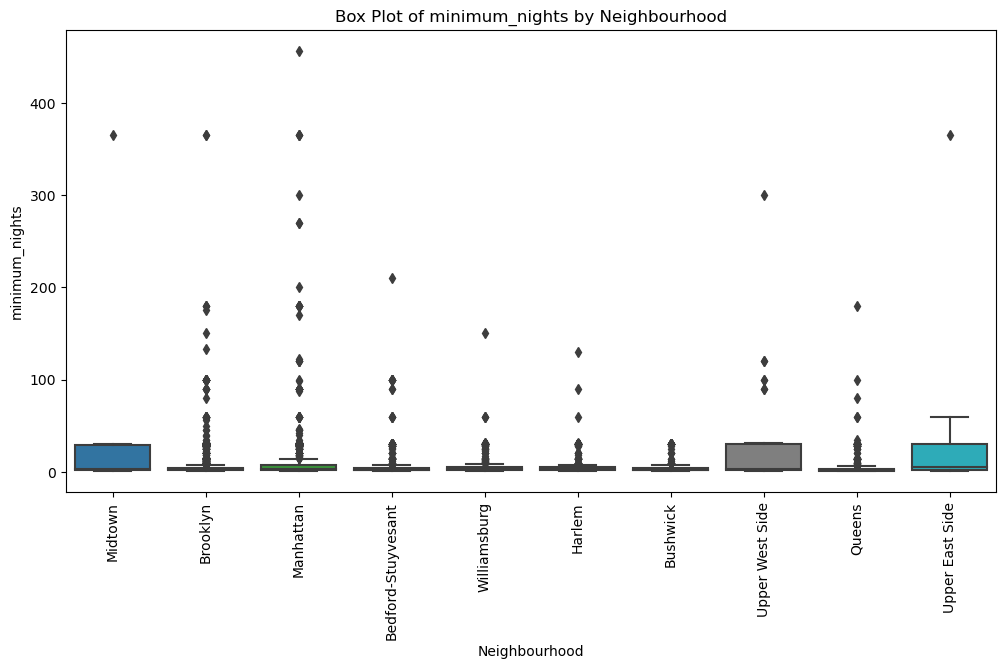

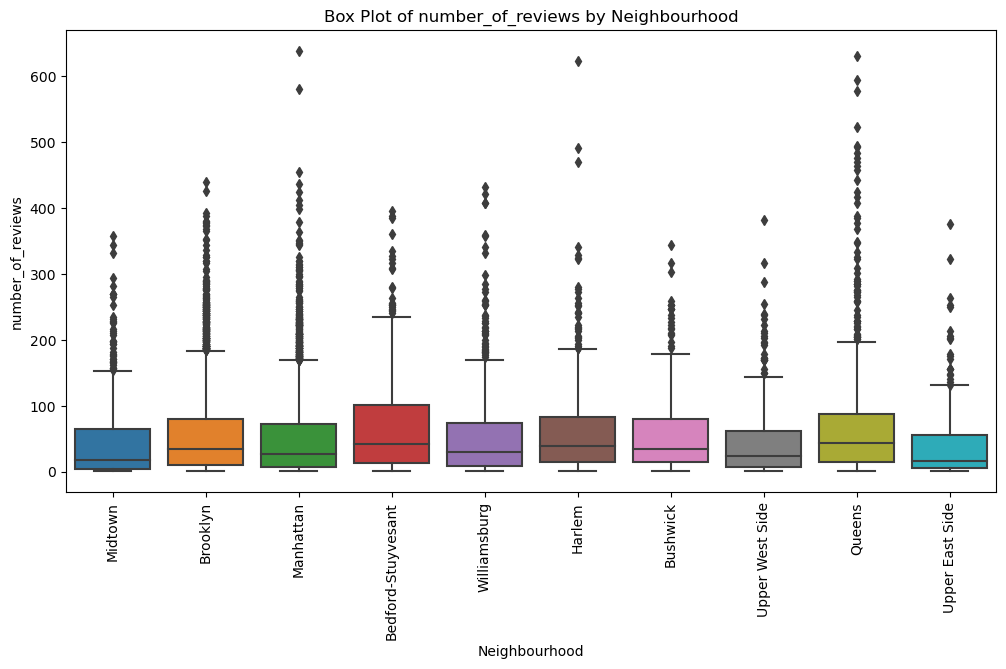

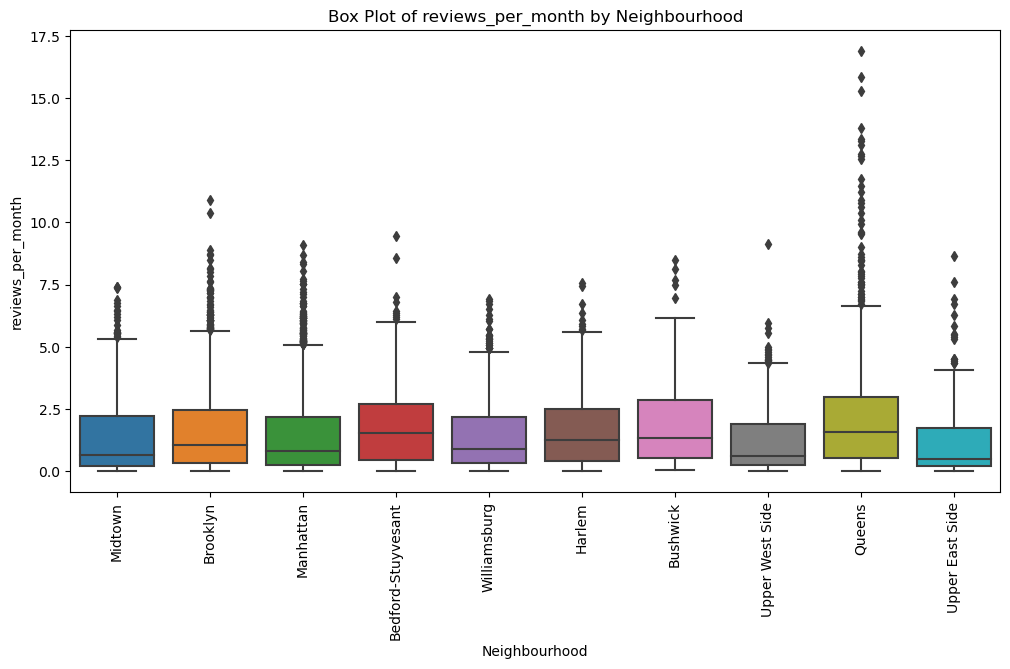

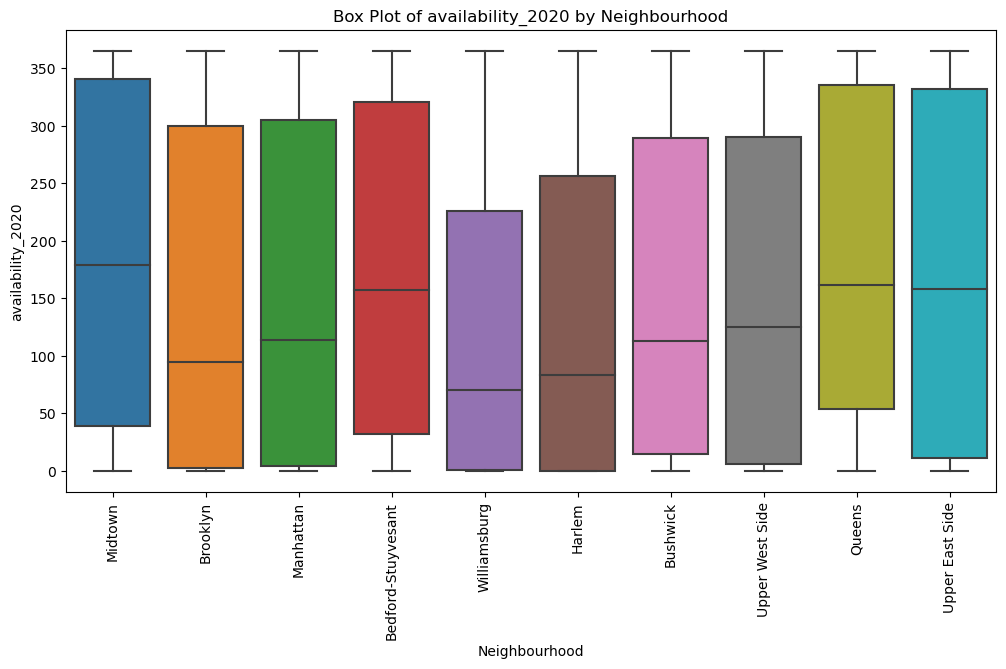

In [98]:
#variables by beighbourhood:

numeric_columns = ['price', 'days_occupied_in_2019', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_2020']  
# List of numeric column names

# Filter the DataFrame to include only the rows with the top 10 categories based on their frequency
category_counts = NYRealstate['neighbourhood'].value_counts().sort_values(ascending=False)
top_10_neighbourhoods = category_counts.head(10)
filtered_NYRealstate = NYRealstate[NYRealstate['neighbourhood'].isin(top_10_neighbourhoods.index)]

# Create box plots for each numeric column
for col in numeric_columns:
    plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
    sns.boxplot(x='neighbourhood', y=col, data=filtered_NYRealstate)
    plt.xlabel('Neighbourhood')
    plt.ylabel(col)
    plt.title(f'Box Plot of {col} by Neighbourhood')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.show()

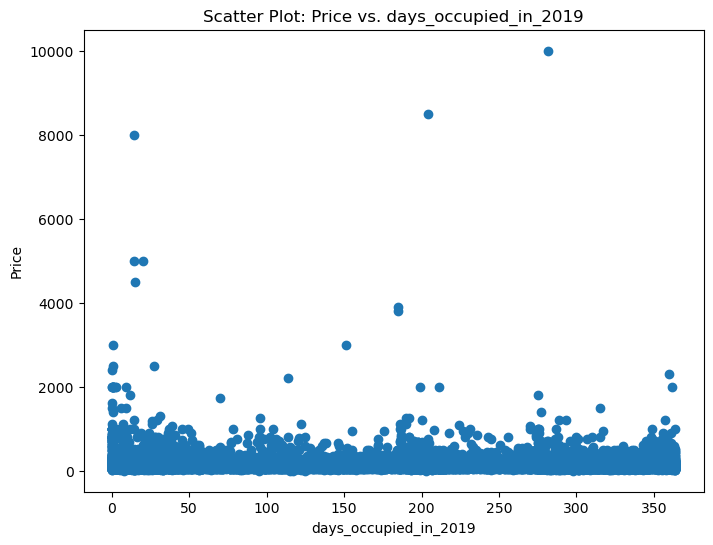

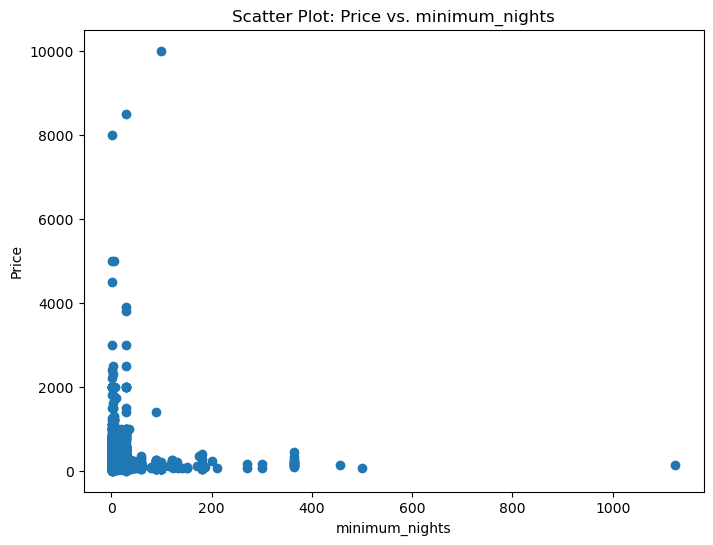

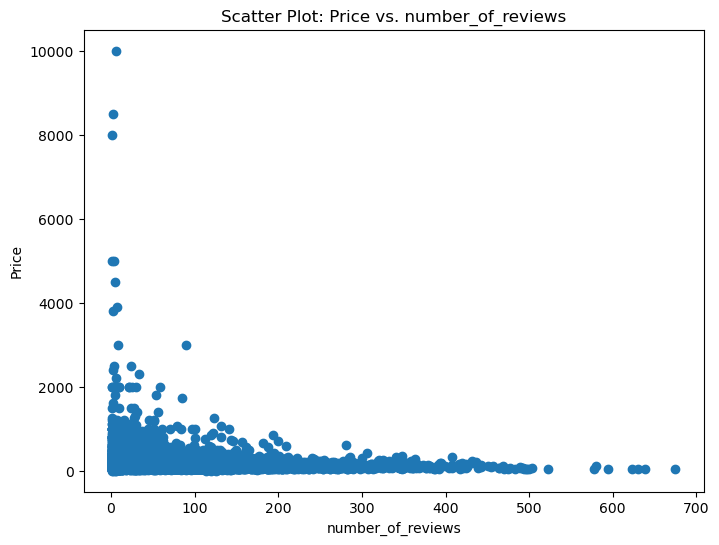

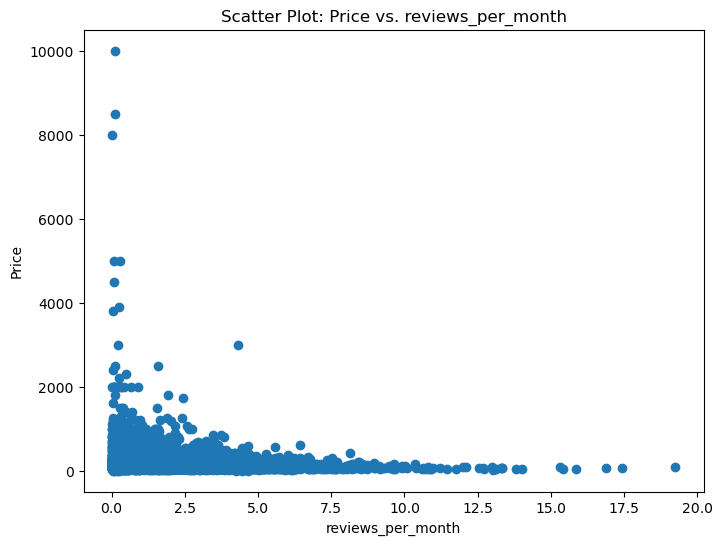

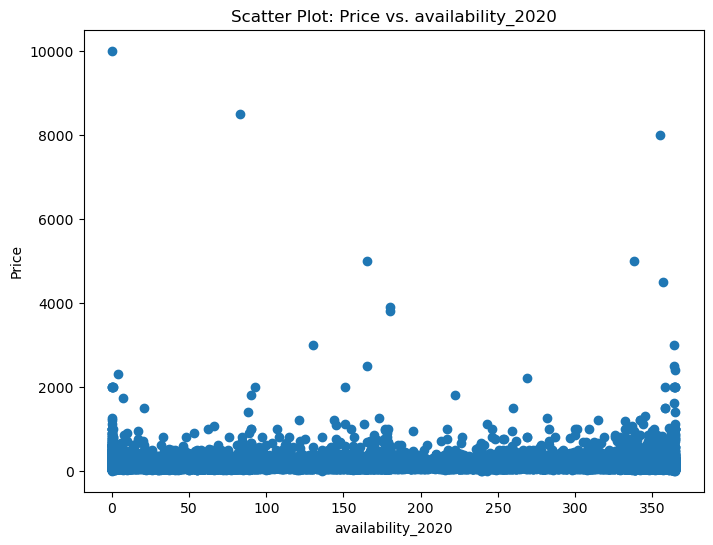

In [96]:
#Scatter plots of variables by price
variables = ['days_occupied_in_2019', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_2020']  
for col in variables:    
    plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
    plt.scatter(NYRealstate[col], NYRealstate['price'])
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.title(f'Scatter Plot: Price vs. {col}')
    plt.show()


In [99]:
#correlation Matrix:

# variables is a list of column names for which you want to calculate correlation coefficients
variables = ['price','days_occupied_in_2019', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_2020']  
correlation_matrix = NYRealstate[variables].corr()

# Display the correlation matrix
print(correlation_matrix)


                          price  days_occupied_in_2019  minimum_nights  \
price                  1.000000              -0.044186        0.027088   
days_occupied_in_2019 -0.044186               1.000000       -0.107419   
minimum_nights         0.027088              -0.107419        1.000000   
number_of_reviews     -0.069971              -0.097414       -0.164502   
reviews_per_month     -0.094442              -0.000978       -0.203744   
availability_2020      0.036388              -0.690022        0.110711   

                       number_of_reviews  reviews_per_month  availability_2020  
price                          -0.069971          -0.094442           0.036388  
days_occupied_in_2019          -0.097414          -0.000978          -0.690022  
minimum_nights                 -0.164502          -0.203744           0.110711  
number_of_reviews               1.000000           0.754916          -0.000268  
reviews_per_month               0.754916           1.000000          -0.0460

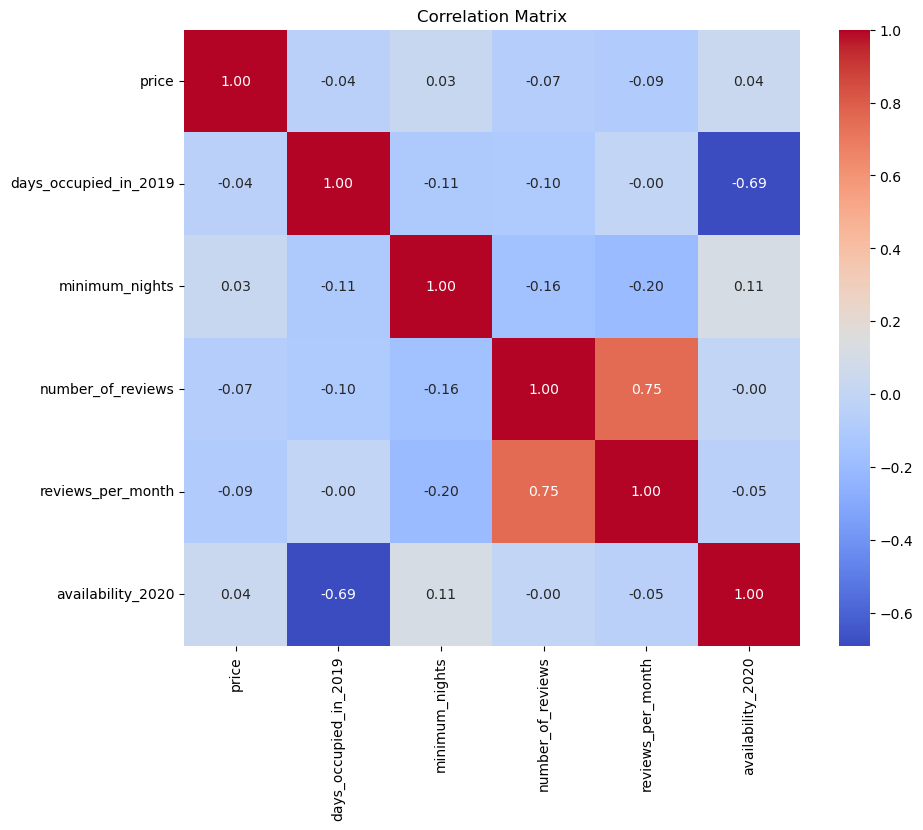

In [100]:
#correlation coeffitients heatmap:

plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()

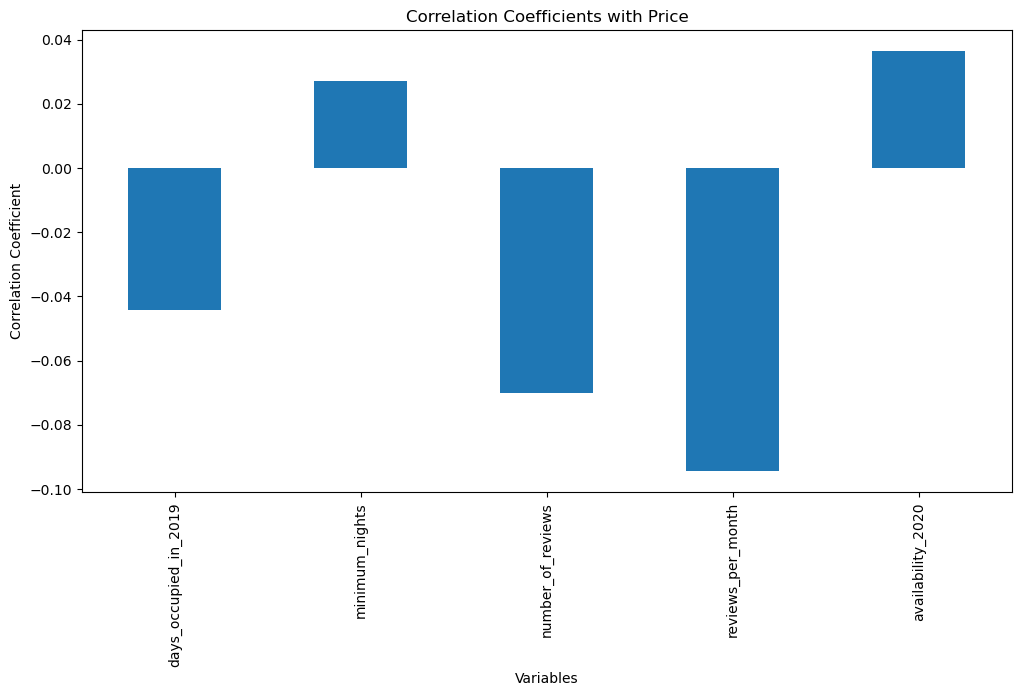

In [104]:
#correlation coefficients with price bar chart:

# Plot the correlation coefficients as a bar chart
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
correlation_matrix['price'].drop('price').plot(kind='bar')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients with Price')
plt.xticks(rotation=90)
plt.show()


In [106]:
#regression analysis:

import statsmodels.api as sm

X = NYRealstate[['days_occupied_in_2019', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_2020']]  # Predictor variables
y = NYRealstate['price']    # Response variable

# Add a constant term to the predictor variable(s)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression analysis
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     38.85
Date:                Tue, 30 May 2023   Prob (F-statistic):           8.02e-40
Time:                        21:06:57   Log-Likelihood:            -1.1777e+05
No. Observations:               17614   AIC:                         2.356e+05
Df Residuals:                   17608   BIC:                         2.356e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   174.40

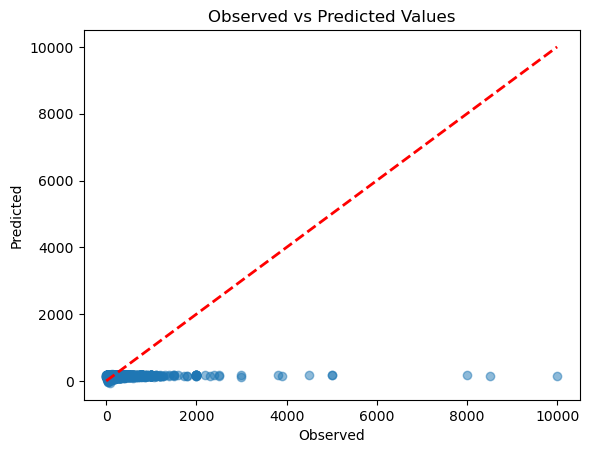

In [107]:
#scatter plot of observed vs predicted values:

# Plotting observed vs predicted values
plt.scatter(y, results.predict(), alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Observed vs Predicted Values')
plt.show()


In [101]:
#Group the data by categorical variables and calculate aggregate statistics within each group.

category_counts = NYRealstate['neighbourhood'].value_counts().sort_values(ascending=False)
top_10_neighbourhoods = category_counts.head(10)
filtered_NYRealstate = NYRealstate[NYRealstate['neighbourhood'].isin(top_10_neighbourhoods.index)]

categorical_variables = ['neighbourhood', 'room_type']  
numeric_variables = ['price', 'days_occupied_in_2019', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_2020']  
grouped_data = filtered_NYRealstate.groupby(categorical_variables)[numeric_variables].agg(['mean', 'median', 'count'])

# Display the grouped data
print(grouped_data)

                                         price               \
                                          mean median count   
neighbourhood      room_type                                  
Bedford-Stuyvesant Entire home/apt  158.824940  130.0   417   
                   Hotel room        36.857143   36.0     7   
                   Private room      67.368715   62.0   358   
                   Shared room       46.705882   35.0    17   
Brooklyn           Entire home/apt  179.416134  149.0  2033   
                   Hotel room       131.631579  129.0    19   
                   Private room      75.088420   65.0  1753   
                   Shared room       42.285714   35.0    70   
Bushwick           Entire home/apt  134.992481  126.0   133   
                   Private room      62.313364   60.0   217   
                   Shared room       30.727273   30.0    11   
Harlem             Entire home/apt  182.530466  150.0   279   
                   Hotel room        79.000000   79.0  

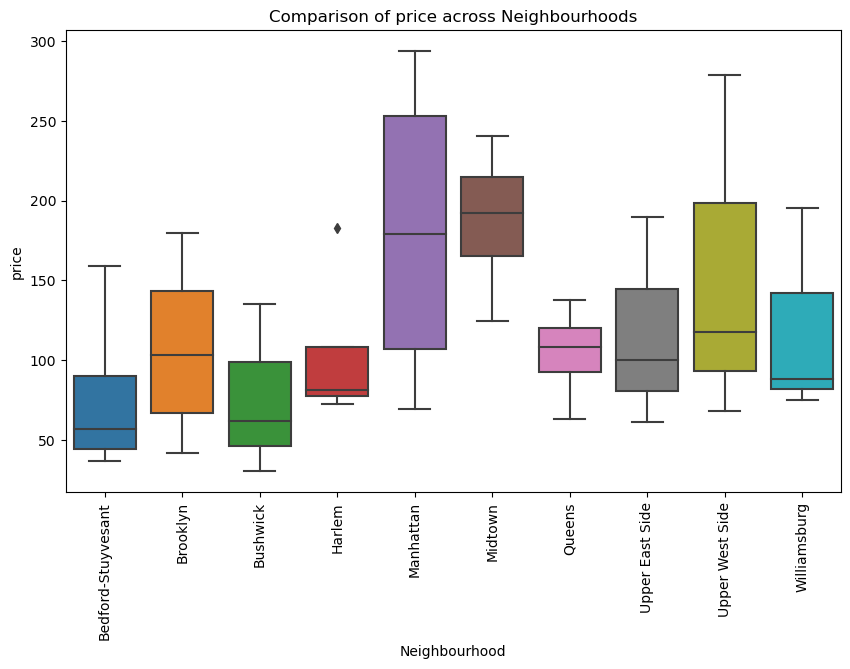

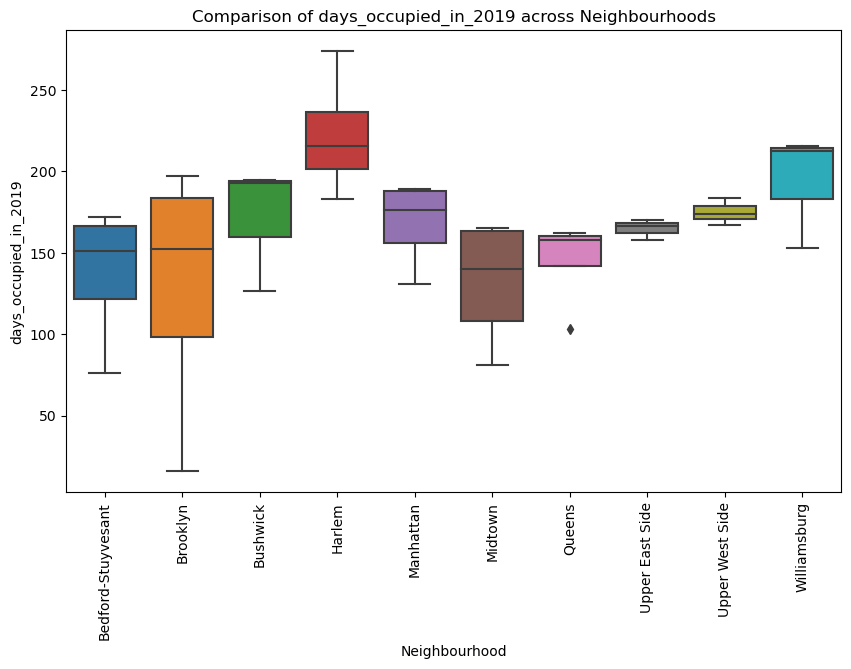

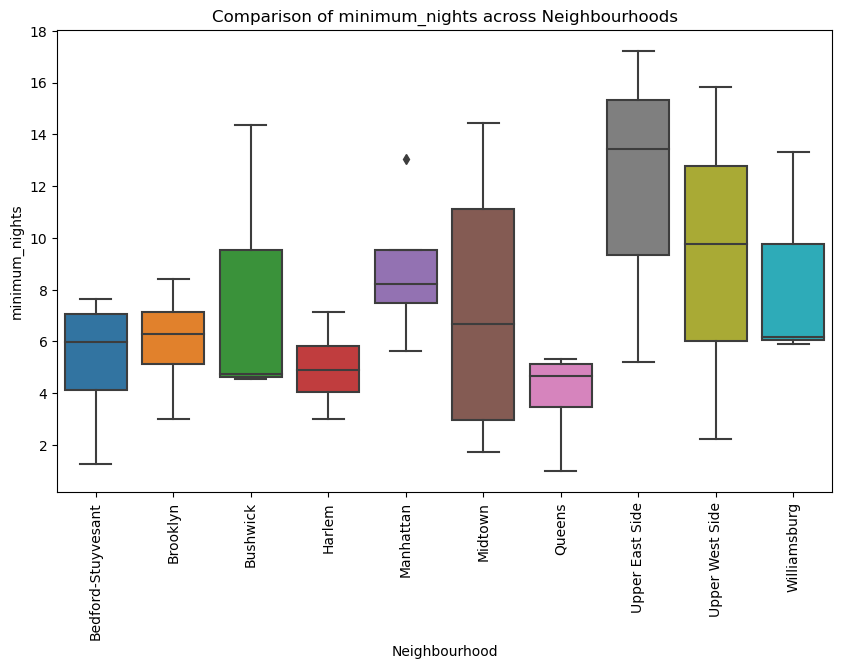

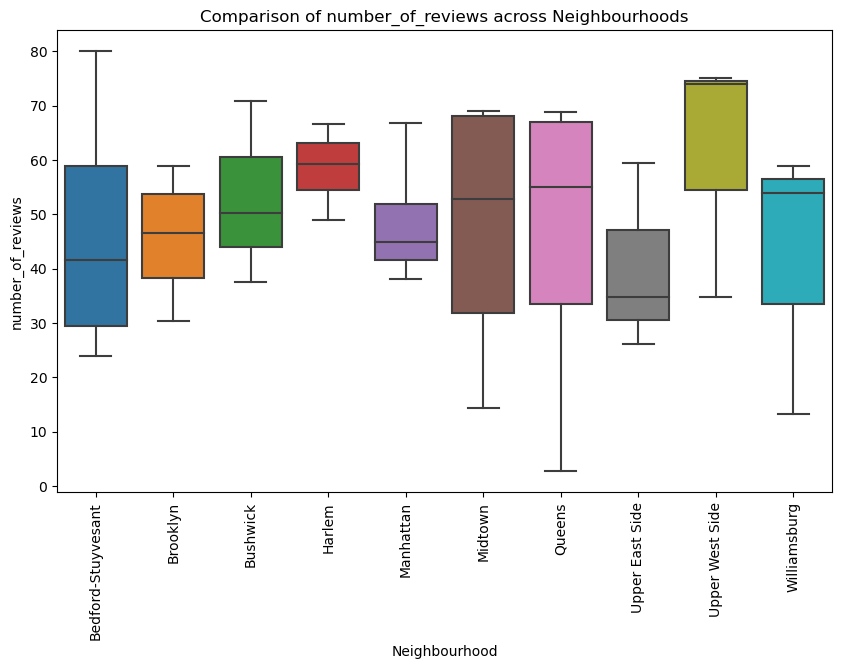

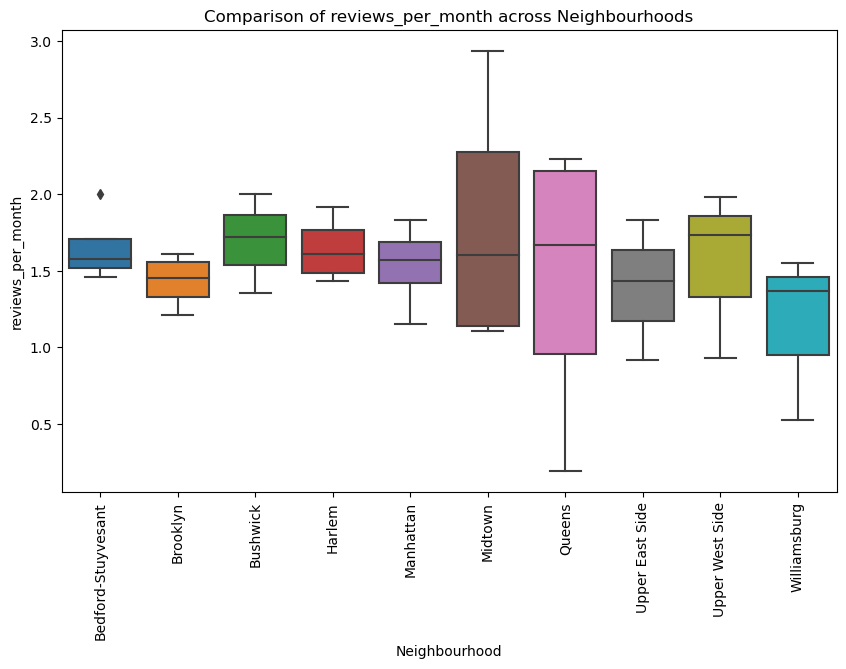

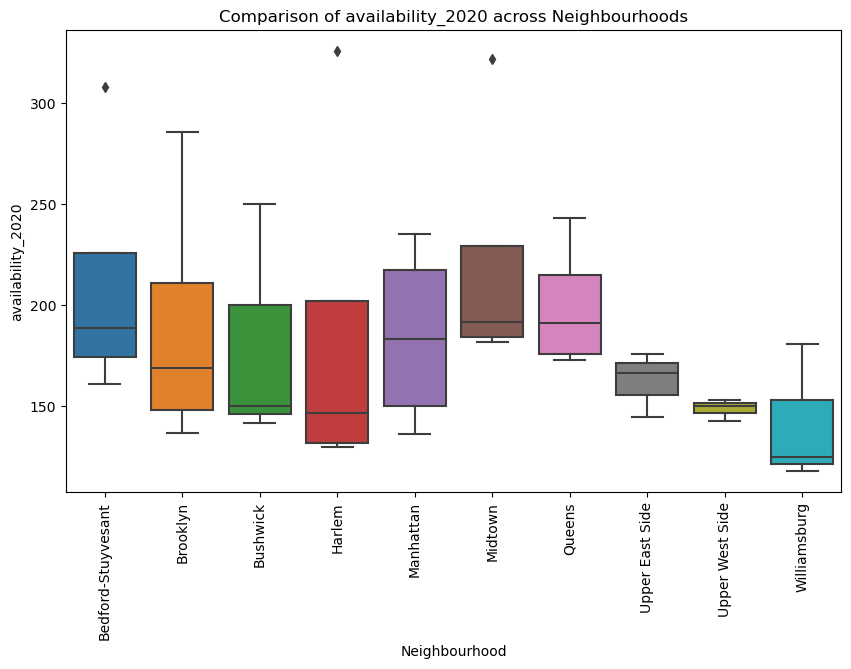

In [102]:
#box plot of comparison of numeric variables across neighbourhoods:

category_counts = NYRealstate['neighbourhood'].value_counts().sort_values(ascending=False)
top_10_neighbourhoods = category_counts.head(10)
filtered_NYRealstate = NYRealstate[NYRealstate['neighbourhood'].isin(top_10_neighbourhoods.index)]

categorical_variables = ['neighbourhood', 'room_type']
numeric_variables = ['price', 'days_occupied_in_2019', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_2020']
grouped_data = filtered_NYRealstate.groupby(categorical_variables)[numeric_variables].agg(['mean', 'median', 'count'])

for col in numeric_columns:
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
    sns.boxplot(x='neighbourhood', y=(col, 'mean'), data=grouped_data.reset_index())
    plt.xlabel('Neighbourhood')
    plt.ylabel(col)
    plt.title(f'Comparison of {col} across Neighbourhoods')
    plt.xticks(rotation=90)
    plt.show()


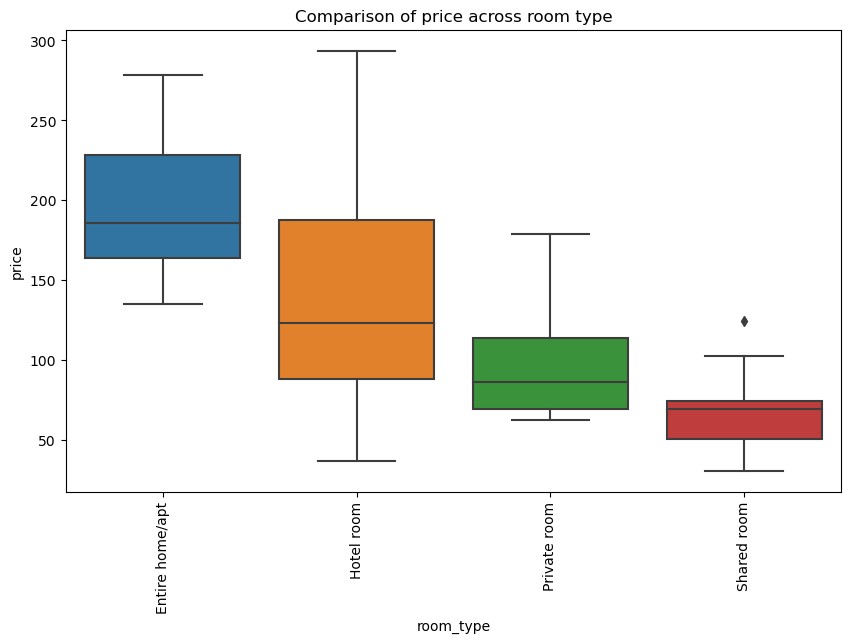

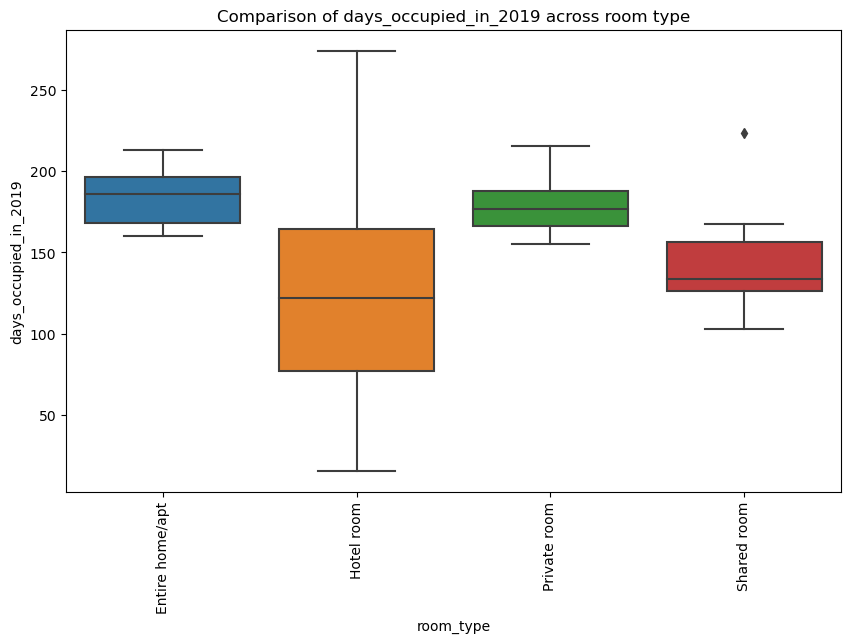

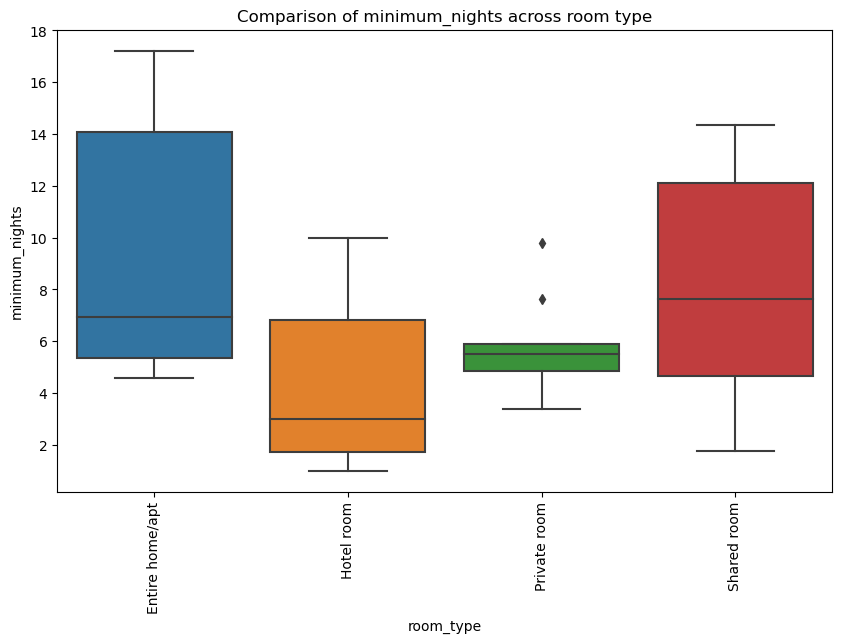

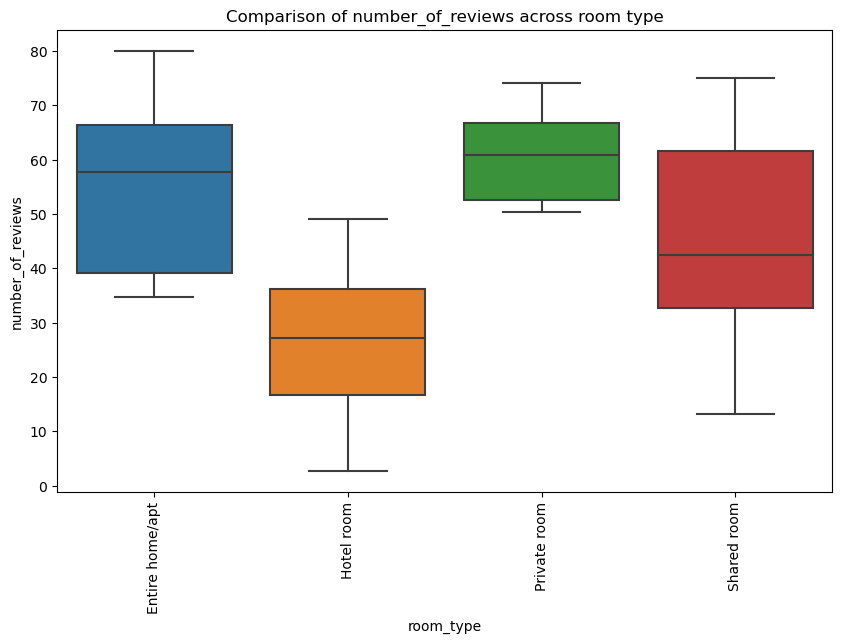

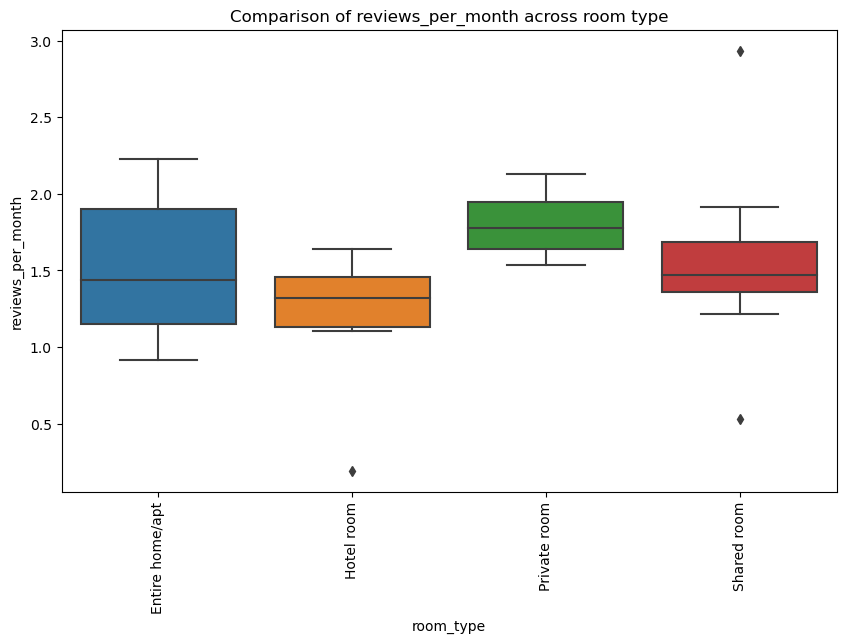

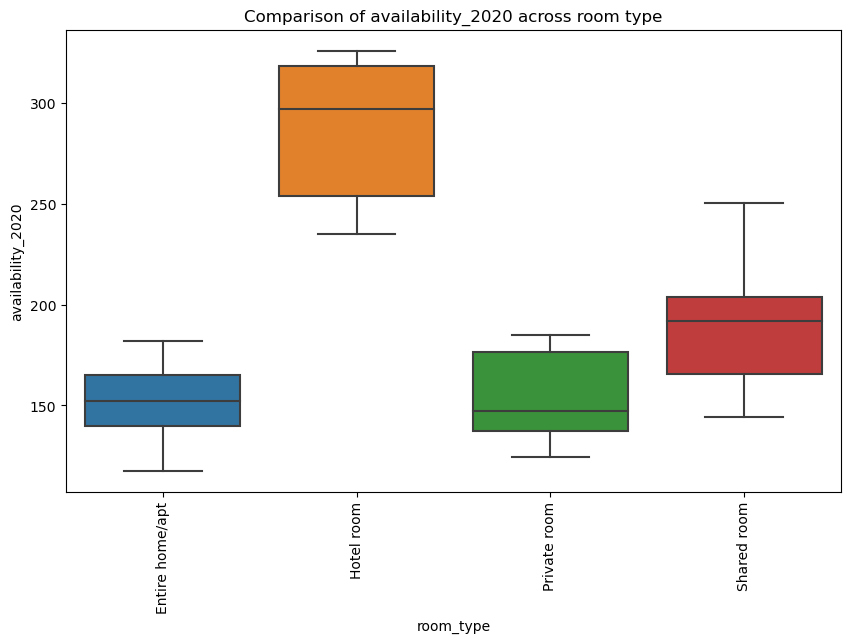

In [103]:
#box plot of comparison of numeric variables across room type:
categorical_variables = ['neighbourhood', 'room_type']
numeric_variables = ['price', 'days_occupied_in_2019', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_2020']
grouped_data = filtered_NYRealstate.groupby(categorical_variables)[numeric_variables].agg(['mean', 'median', 'count'])

for col in numeric_variables:
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
    sns.boxplot(x='room_type', y=(col, 'mean'), data=grouped_data.reset_index())
    plt.xlabel('room_type')
    plt.ylabel(col)
    plt.title(f'Comparison of {col} across room type')
    plt.xticks(rotation=90)
    plt.show()